### Summary:

Created the pipelines for the Feature engineering teachniques , trained the multiple models together and observed the accuracy of the models
    

## Pipelines:

In data science, a pipeline refers to a sequence of data processing components or steps that are chained together in a specific order to perform a series of transformations or analyses on a dataset. Pipelines are a fundamental concept in data science and are commonly used for tasks such as data preprocessing, feature engineering, model building, and evaluation.

Here are some key aspects and benefits of using pipelines in data science:

**Modularity and Organization:** Pipelines allow data scientists to break down complex data processing tasks into smaller, more manageable components or steps. Each step in the pipeline typically performs a specific transformation or operation on the data, making it easier to understand and maintain the workflow.

**Reproducibility:** By encapsulating the entire data processing workflow into a pipeline, data scientists can ensure that their analyses are reproducible. They can easily replicate the same sequence of transformations on new datasets or updates to existing datasets.

**Automation:** Pipelines enable automation of repetitive data processing tasks, saving time and effort. Once a pipeline is defined, it can be applied to new data with minimal manual intervention, streamlining the analysis process.

**Parameter Tuning and Optimization:** Pipelines facilitate parameter tuning and optimization by allowing data scientists to experiment with different configurations of data processing components and model hyperparameters in a systematic manner.

**Integration with Model Building:** Pipelines seamlessly integrate data preprocessing and feature engineering steps with the model building process. This ensures that the entire workflow, from data preprocessing to model evaluation, is streamlined and coherent.

**Cross-Validation and Evaluation:** Pipelines enable the application of cross-validation techniques to evaluate model performance consistently across different folds of the data. This ensures that the evaluation process is unbiased and robust.

In practice, pipelines are often implemented using libraries or frameworks in programming languages like Python. For example, the scikit-learn library in Python provides a Pipeline class that allows users to chain together multiple data processing and modeling steps into a single workflow. Other libraries like TensorFlow and PyTorch also support the concept of pipelines for building and training deep learning models.

In [1]:
import seaborn as sns

In [2]:
sns.load_dataset("tips") # In Real word data science problem we will get the data from SQL or MongoDB database
# In PW Skills course, we learned how to extract the data from web and store data under MySQL and MongoDB as well.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df=sns.load_dataset("tips")

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
## We need to perform the EDA and feature engineering on the data if want (as we are more focusing on the random forest algo,
# we are skipping the EDA and FE analysis, 5but from our end we must do EDA and all)

In [6]:
## Let's take "time" as dependent feature (Let's find the at which time the customer coming to restaurant based on total_bill,
# tip, sex, smoker, day, size)

In [7]:
df["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [8]:
## Handling missing values
# Handling categorical values
# Handling Outliers
# Feature scaling


## we will try to automate the all the above steps using pipeline

In [9]:
## EDA can't be automated beacuse EDA needs to be performed from our end to understand about the data.

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
df.select_dtypes(include=["category"]) # Using this we can extract only the categorical features

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [13]:
for i in df.columns:
    print(df[i].dtypes=="category")

False
False
True
True
True
True
False


In [14]:
df["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [15]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [16]:
# As we know we took "time" as the dependent or target feature, so let's apply label encoding for target variable

from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

In [17]:
encoder.fit_transform(df["time"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [18]:
df["time"]=encoder.fit_transform(df["time"])

In [19]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,0,3
240,27.18,2.00,Female,Yes,Sat,0,2
241,22.67,2.00,Male,Yes,Sat,0,2
242,17.82,1.75,Male,No,Sat,0,2


In [20]:
encoder.classes_

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
df["time"].value_counts() # 0 --> Dinner , 1 --> Lunch

time
0    176
1     68
Name: count, dtype: int64

In [22]:
## Let's seperate the independent and dependent features

X= df.drop("time",axis=1)
y=df[["time"]]

In [23]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [24]:
y.head()

,time
0,0
1,0
2,0
3,0
4,0


In [25]:
# Let's seperate the train and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [26]:
X_train.shape

(195, 6)

In [27]:
y_train.shape

(195, 1)

In [28]:
X_test.shape

(49, 6)

In [29]:
df.shape

(244, 7)

In [30]:
## 1. Handling missing values
# 2. Handling categorical values
# 3. Handling Outliers
# 4. Feature scaling

In [31]:
## 1. Handling missing values

from sklearn.impute import SimpleImputer # we use simple impputer (mean, median,mode imputer)

# 2. Handling categorical values

# As we can see in the independent categorical features (all are nominal categorical variables), we use one hot encoder. for any doubt visit the below link:

# https://github.com/karrinethaji/ML_Basics_11_Part1-Important-Feature-engineering-techniques/blob/main/7.%20Data%20Encoding%20-%201.%20Nominal-OHE%20encoding.ipynb

from sklearn.preprocessing import OneHotEncoder

# 3. Handling Outliers

# In this dataset we don't handle outlier so we are ignoring this, let's see the outlier part in the upcoming end to end project

# 4. Feature scaling

# In Random forest, It is not compulsory to do the scaling of features, It is optional.

from sklearn.preprocessing import StandardScaler

### Let's create a pipeline

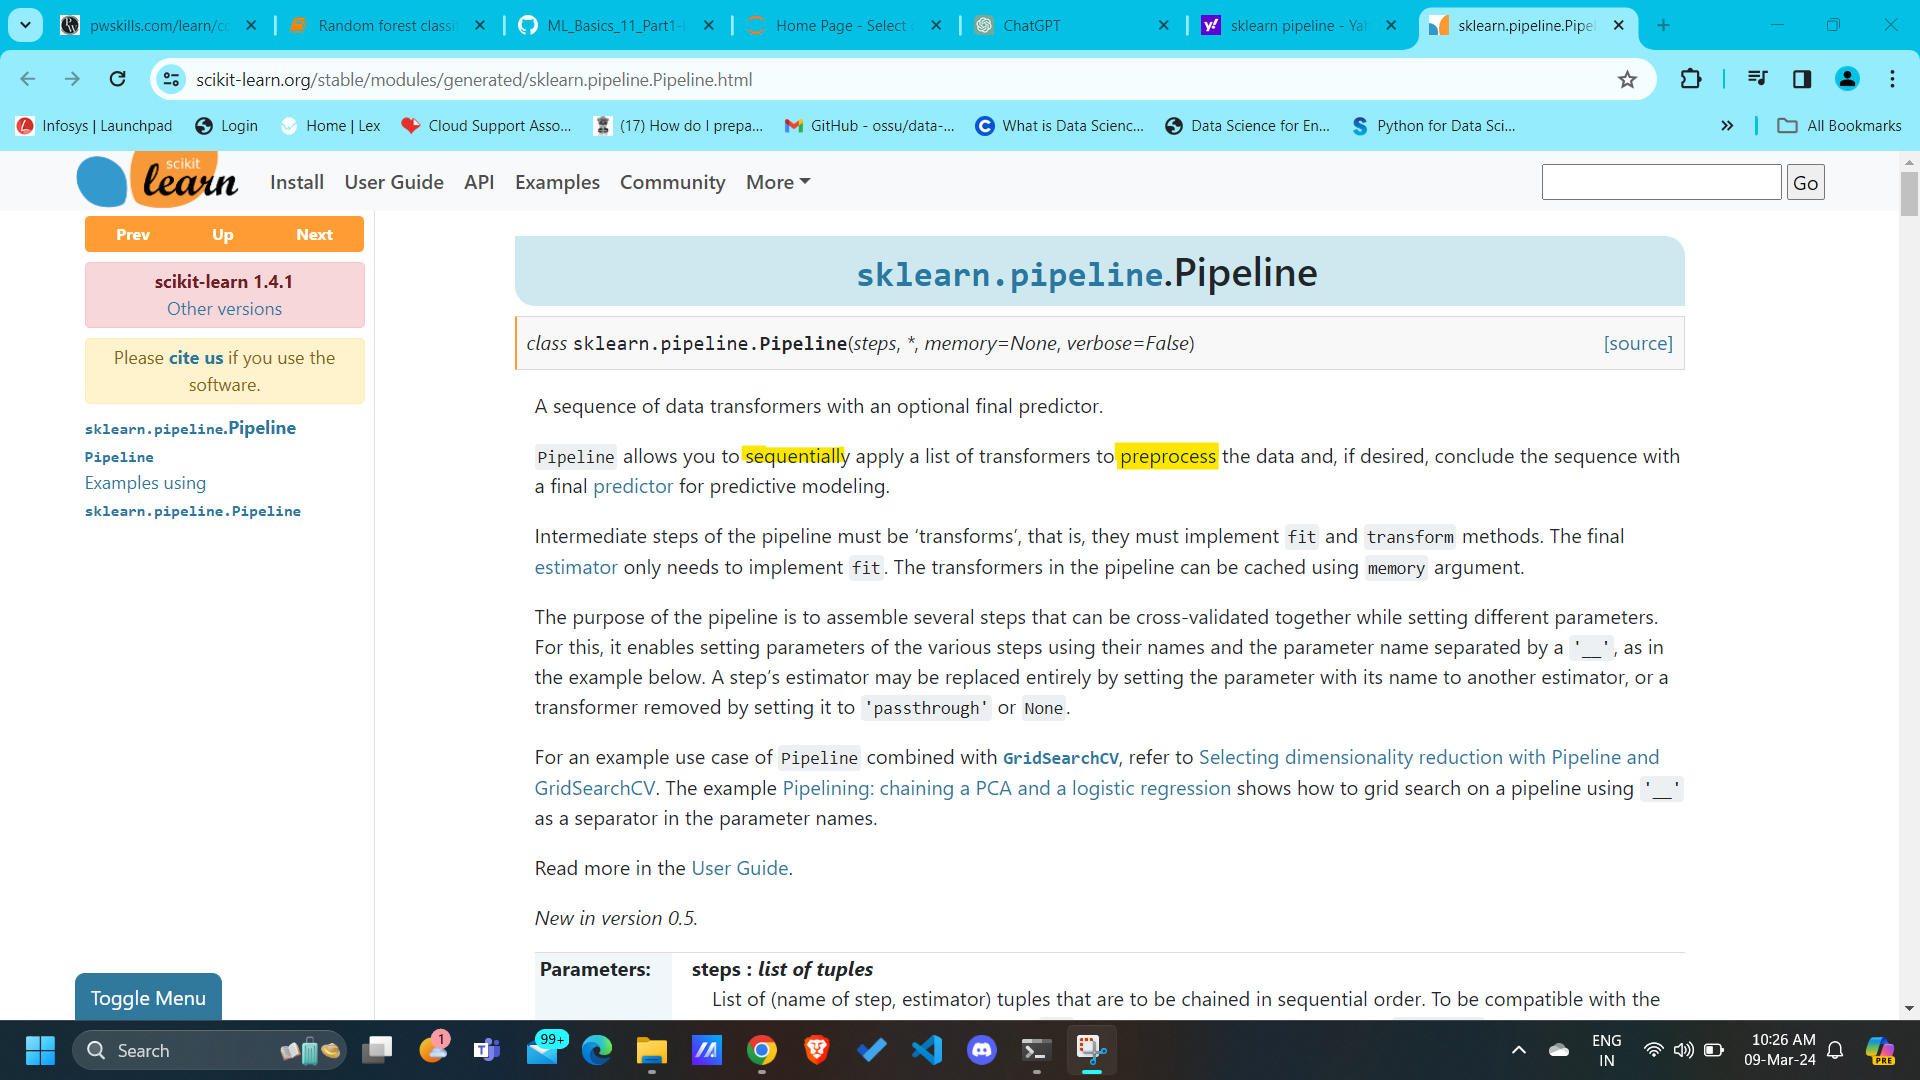

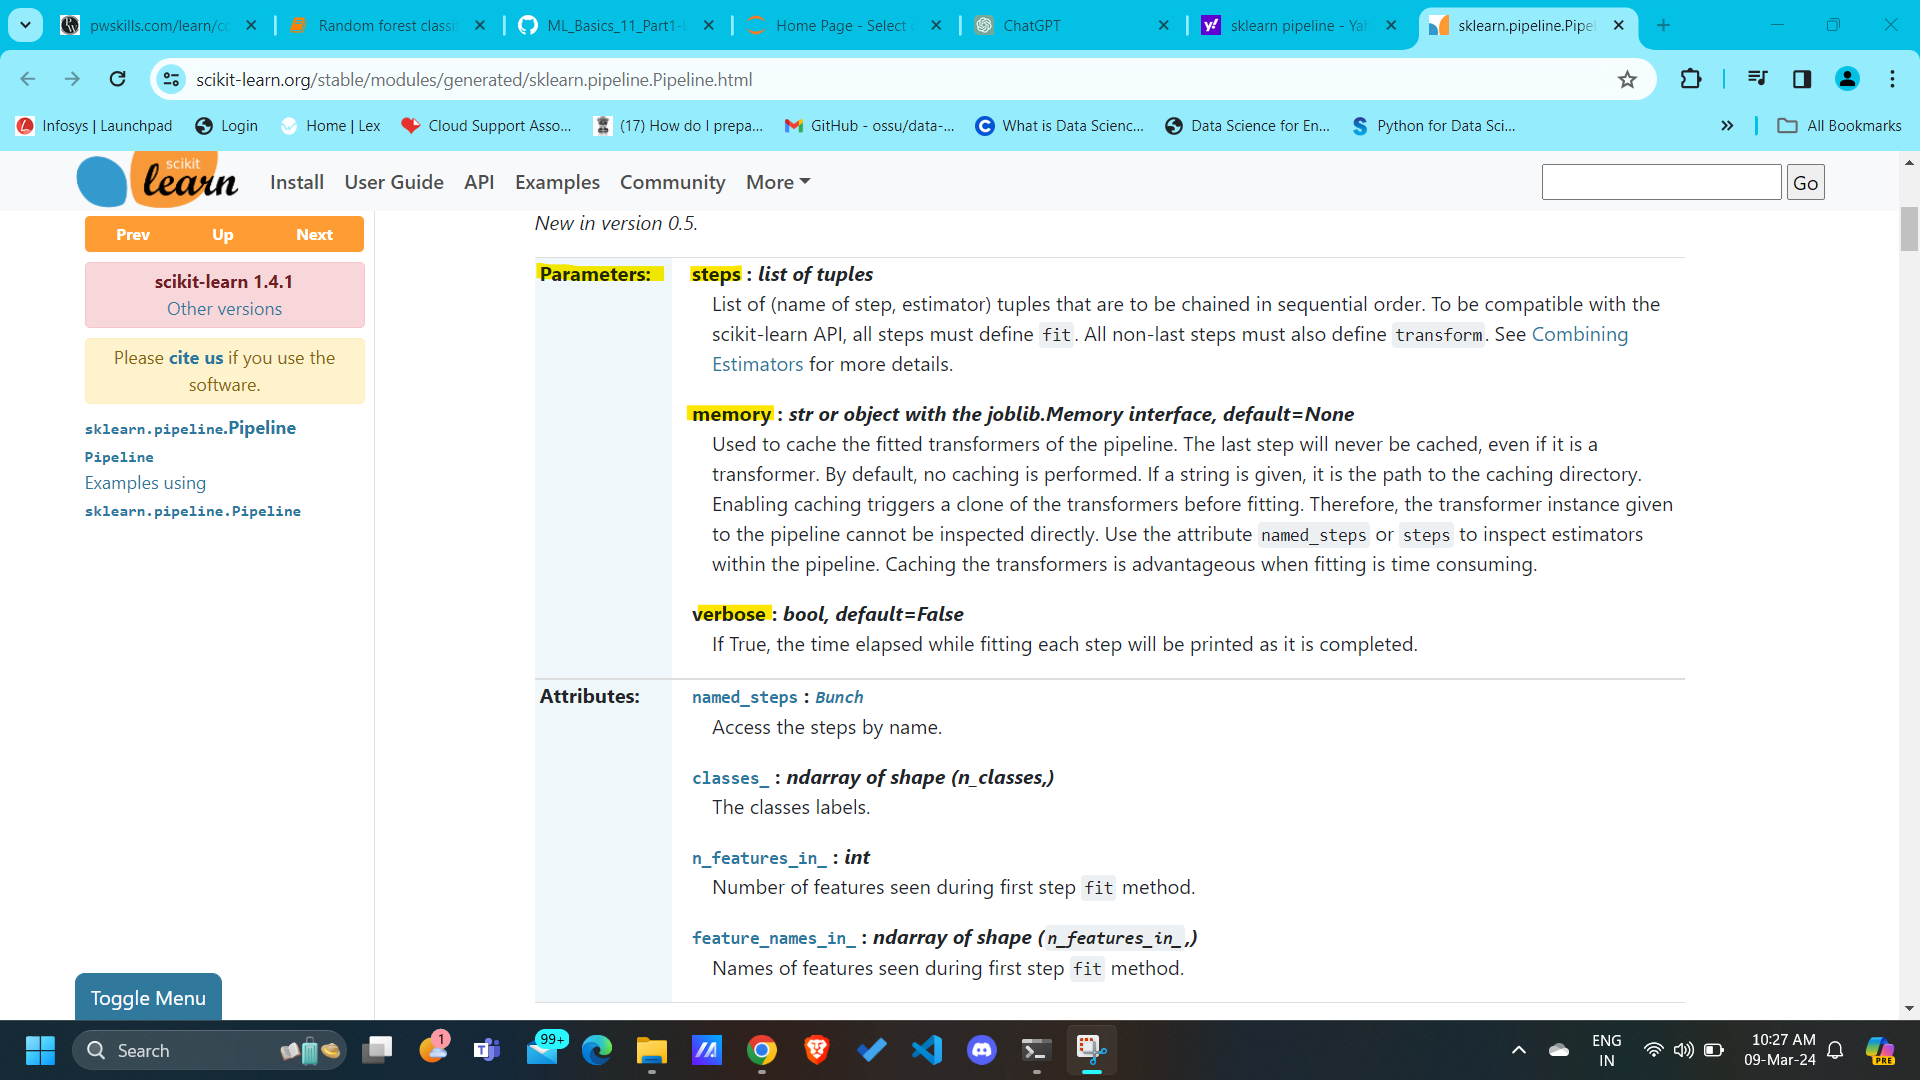

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Applies transformers to columns of an array or pandas DataFrame.

# This estimator allows different columns or column subsets of the input to be transformed separately and the features generated 
# by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to 
# combine several feature extraction mechanisms or transformations into a single transformer.

In [33]:
categorical_columns= list(df.select_dtypes(include=["category"]).columns)
numerical_columns= ['total_bill', 'tip', 'size'] # time is target feature so, we won't take that

In [34]:
print(categorical_columns)
print(numerical_columns)

['sex', 'smoker', 'day']
['total_bill', 'tip', 'size']


In [35]:
## Feature engineering automation

## Let's create the pipeline for numerical feature

## For the numerical features, we will impute the missing values first, (if you have outliers then we will use startergy as "
# median", if the data doesn't have outliers then we use "mean", for categorical features we use mode)
# Once we done with missing values, we will sclae the features.

numerical_pipeline= Pipeline(
    
    steps=[("imputer",SimpleImputer(strategy="median")),# Handling the missing values
           ("scaler",StandardScaler()) # Feature scaling
          ]
)

## Let's create the pipeline for categorical feature

## Here also we will fill the missing values with most frequent records
# we will perform the encoding to convert the categorical features into numerical features

categorical_pipeline= Pipeline(
    
    steps=[("imputer",SimpleImputer(strategy="most_frequent")),# Handling the missing values using mode
           ("onehotencoding",OneHotEncoder()) # Categorical features to numerical features (In Random forest or decision tree , this step is optional because for DT and RF we won't need to scale the features)
          ]
)

In [36]:
# Let's concatenate the both the pipelines using transformer

# Need to provide list of pipelines

preprocessor= ColumnTransformer([
    ("num_pipeline",numerical_pipeline,numerical_columns),# "name of pipeline","pipeline variable","numerical columns"
    ("cat_pipeline",categorical_pipeline,categorical_columns)
])

In [37]:
## We have created the pipelines to deal with feature engineering techniques, so now we can directly use the above transformer
# object to deal with data

preprocessor.fit_transform(X_train) # Feture engineering and preprocessing is done with one step

array([[-0.79306155, -0.2580329 , -0.61214068, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.46322744, -0.74211442, -0.61214068, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80730659,  0.6399734 , -0.61214068, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.65383098, -1.46472887, -0.61214068, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.64749986,  0.32426806, -0.61214068, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.75289699, -0.41237773,  0.45363997, ...,  1.        ,
         0.        ,  0.        ]])

In [38]:
import pandas as pd

pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10
0,-0.793062,-0.258033,-0.612141,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.463227,-0.742114,-0.612141,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.807307,0.639973,-0.612141,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.313709,0.990757,1.519421,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.484419,-0.742114,-0.612141,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
190,0.031128,0.682067,-0.612141,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
191,-0.615878,-0.047563,-0.612141,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
192,-1.653831,-1.464729,-0.612141,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
193,1.647500,0.324268,-0.612141,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,0,3
240,27.18,2.00,Female,Yes,Sat,0,2
241,22.67,2.00,Male,Yes,Sat,0,2
242,17.82,1.75,Male,No,Sat,0,2


In [40]:
X_train= preprocessor.fit_transform(X_train) # Here we need to use "fit_transform"
X_test= preprocessor.transform(X_test) # Here we need use "transform"

# fit_transform will save all the parameters. for example if you are doing standard scaler then it will store mean, std.dev
# values and while using "transform", it will use the already calculated mean and std. dev to transform the X_test data.

In [41]:
## Let's apply the data to model

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [42]:
# Let's automating the model training process

# In Real life, we will train the multiple models at one time and will analyze the output

models= {
    "Random forest":RandomForestClassifier(),
    "Decision tree":DecisionTreeClassifier(),
    "SVC": SVC()
    
}

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
def evaluate_model(X_train, X_test, y_train, y_test, model): # we can initialize hyperparameters as well
    reports={}
    
    for i in range(0,len(models)):
        model= list(models.values())[i]
        
        # Training the model
         
        model.fit(X_train,y_train)
        
        # predict the data
        y_test_pred= model.predict(X_test)
        
        # Get accuracy of the model
        
        test_model_accuracy = accuracy_score(y_test,y_test_pred)
        
        reports[list(models.keys())[i]]= test_model_accuracy # Creating the keys and accuracies
        
    return reports  

In [45]:
evaluate_model(X_train,X_test,y_train,y_test,models) # It will provide the below accuracies

C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Nethajimahendra K\Anaconda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Random forest': 0.9591836734693877,
 'Decision tree': 0.9387755102040817,
 'SVC': 0.9591836734693877}

In [46]:
## As we can see Random forest and SVC provides good accuracy, Let's focus more on random forest

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
## Let's do hyper-parameter tuning for the randomforest algorithm
## we can hyperparameter as well under the above evaluate model function, I will include the reference code at the end of 
# this notebook

In [49]:
classifier= RandomForestClassifier()

In [50]:
params={
    "n_estimators":[100,1000],
    "criterion":["gini", "entropy", "log_loss"],
    "max_features":["sqrt", "log2", None]
}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

rsc=RandomizedSearchCV(classifier,param_distributions=params, scoring="accuracy",cv=5,verbose=3)

In [52]:
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_features=None, n_estimators=1000;, score=0.974 total time=   1.7s
[CV 2/5] END criterion=gini, max_features=None, n_estimators=1000;, score=0.897 total time=   1.6s
[CV 3/5] END criterion=gini, max_features=None, n_estimators=1000;, score=1.000 total time=   1.6s
[CV 4/5] END criterion=gini, max_features=None, n_estimators=1000;, score=0.949 total time=   1.6s
[CV 5/5] END criterion=gini, max_features=None, n_estimators=1000;, score=0.923 total time=   1.7s
[CV 1/5] END criterion=gini, max_features=None, n_estimators=100;, score=0.974 total time=   0.1s
[CV 2/5] END criterion=gini, max_features=None, n_estimators=100;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=gini, max_features=None, n_estimators=100;, score=0.974 total time=   0.1s
[CV 4/5] END criterion=gini, max_features=None, n_estimators=100;, score=0.949 total time=   0.1s
[CV 5/5] END criterion=gini, max_features=None, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [100, 1000]},
                   scoring='accuracy', verbose=3)

In [53]:
rsc.best_params_

{'n_estimators': 1000, 'max_features': 'sqrt', 'criterion': 'gini'}

In [54]:
y_pred=rsc.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

0.9591836734693877

In [56]:
rfc=RandomForestClassifier(n_estimators= 100, max_features='log2', criterion= 'entropy')

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2')

In [58]:
y_pred=rfc.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred) # same as rsc object output

0.9591836734693877

In [60]:
## We can include hyperparameter training in the above evaluate_method() function, find the below code for the reference.

## Link: https://pastebin.com/xmedEg9b

from sklearn.model_selection import GridSearchCV
 
def evaluate_model(model, X_train, y_train, X_test, y_test, hyperparameters=None):
    if hyperparameters is not None:
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
 
    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)
 
    # Evaluate the model on the test set
    accuracy = best_model.score(X_test, y_test)
 
    return accuracy, best_model
 
# Example usage
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
 
# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
 
# Define models
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42)
 
# Define hyperparameters for tuning (customize based on your needs)
rf_hyperparameters = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
svc_hyperparameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
 
# Evaluate Random Forest with hyperparameter tuning
rf_accuracy, best_rf_model = evaluate_model(rf_model, X_train, y_train, X_test, y_test, hyperparameters=rf_hyperparameters)
 
# Evaluate SVC with hyperparameter tuning
svc_accuracy, best_svc_model = evaluate_model(svc_model, X_train, y_train, X_test, y_test, hyperparameters=svc_hyperparameters)
 
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Tuned Random Forest Model: {best_rf_model}")
 
print(f"SVC Accuracy: {svc_accuracy}")
print(f"Tuned SVC Model: {best_svc_model}")

Random Forest Accuracy: 1.0
Tuned Random Forest Model: RandomForestClassifier(n_estimators=200, random_state=42)
SVC Accuracy: 1.0
Tuned SVC Model: SVC(C=1, kernel='linear', random_state=42)


In [61]:
# Assignment

# Try to implement the regression model by taking the tips dataset , consider "total_bill" as dependent feature and remaining
# features as independent features

# Construct the pipelines, the train the multiple models and find the accuracy's.